In [1]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Creating Symbolic Link
!ln -s /content/gdrive/My\ Drive/ /mydrive

In [3]:
%cd /mydrive/room_instance_segmentation/

/content/gdrive/My Drive/room_instance_segmentation


In [4]:
#Installing Ultralytics
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 593.1/593.1 kB 12.2 MB/s eta 0:00:00


In [5]:
# Import Libraries
from ultralytics import YOLO
import matplotlib.pyplot as plt
import PIL
from IPython.display import Image
import numpy as np
import glob

In [6]:
# Training
!yolo task=segment mode=train model=yolov8s-seg.pt data= data.yaml epochs=50 optimizer=Adam imgsz=640 lr0=0.001

100% 22.8M/22.8M [00:00<00:00, 124MB/s] 
Ultralytics YOLOv8.0.112 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optim

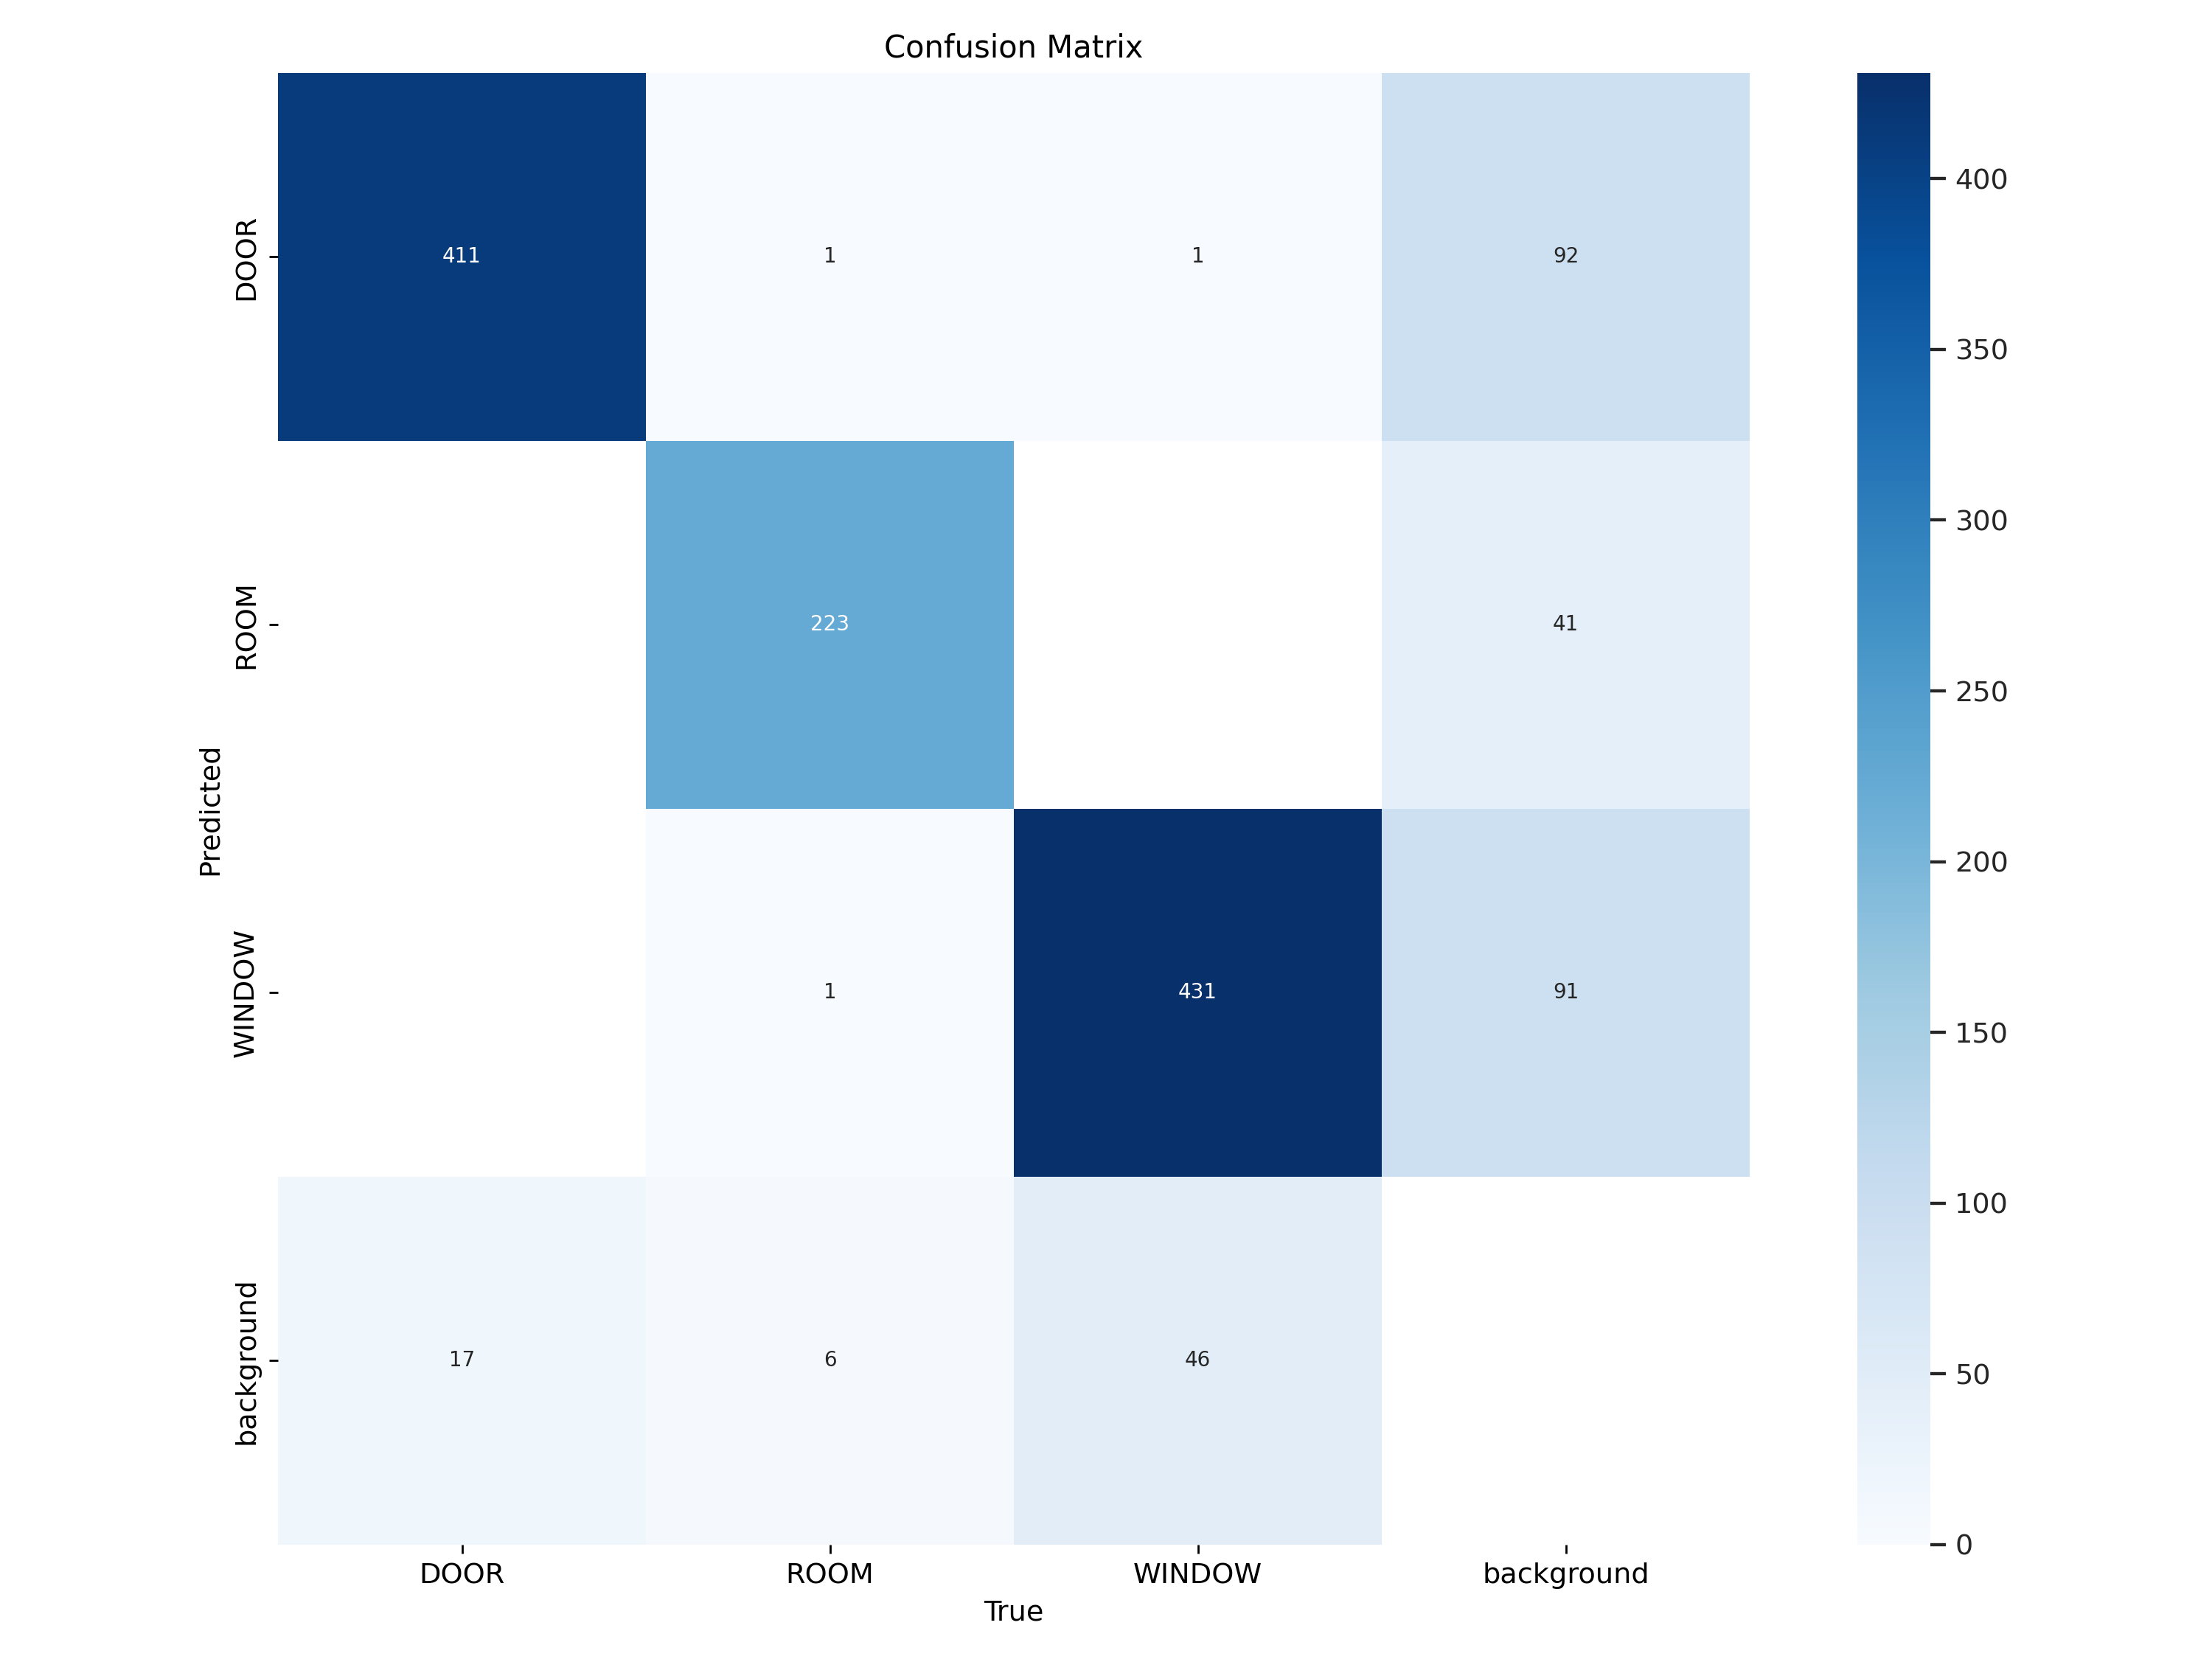

In [7]:
# Displaying the confusion matrix
Image(filename='runs/segment/train/confusion_matrix.png', width=600)

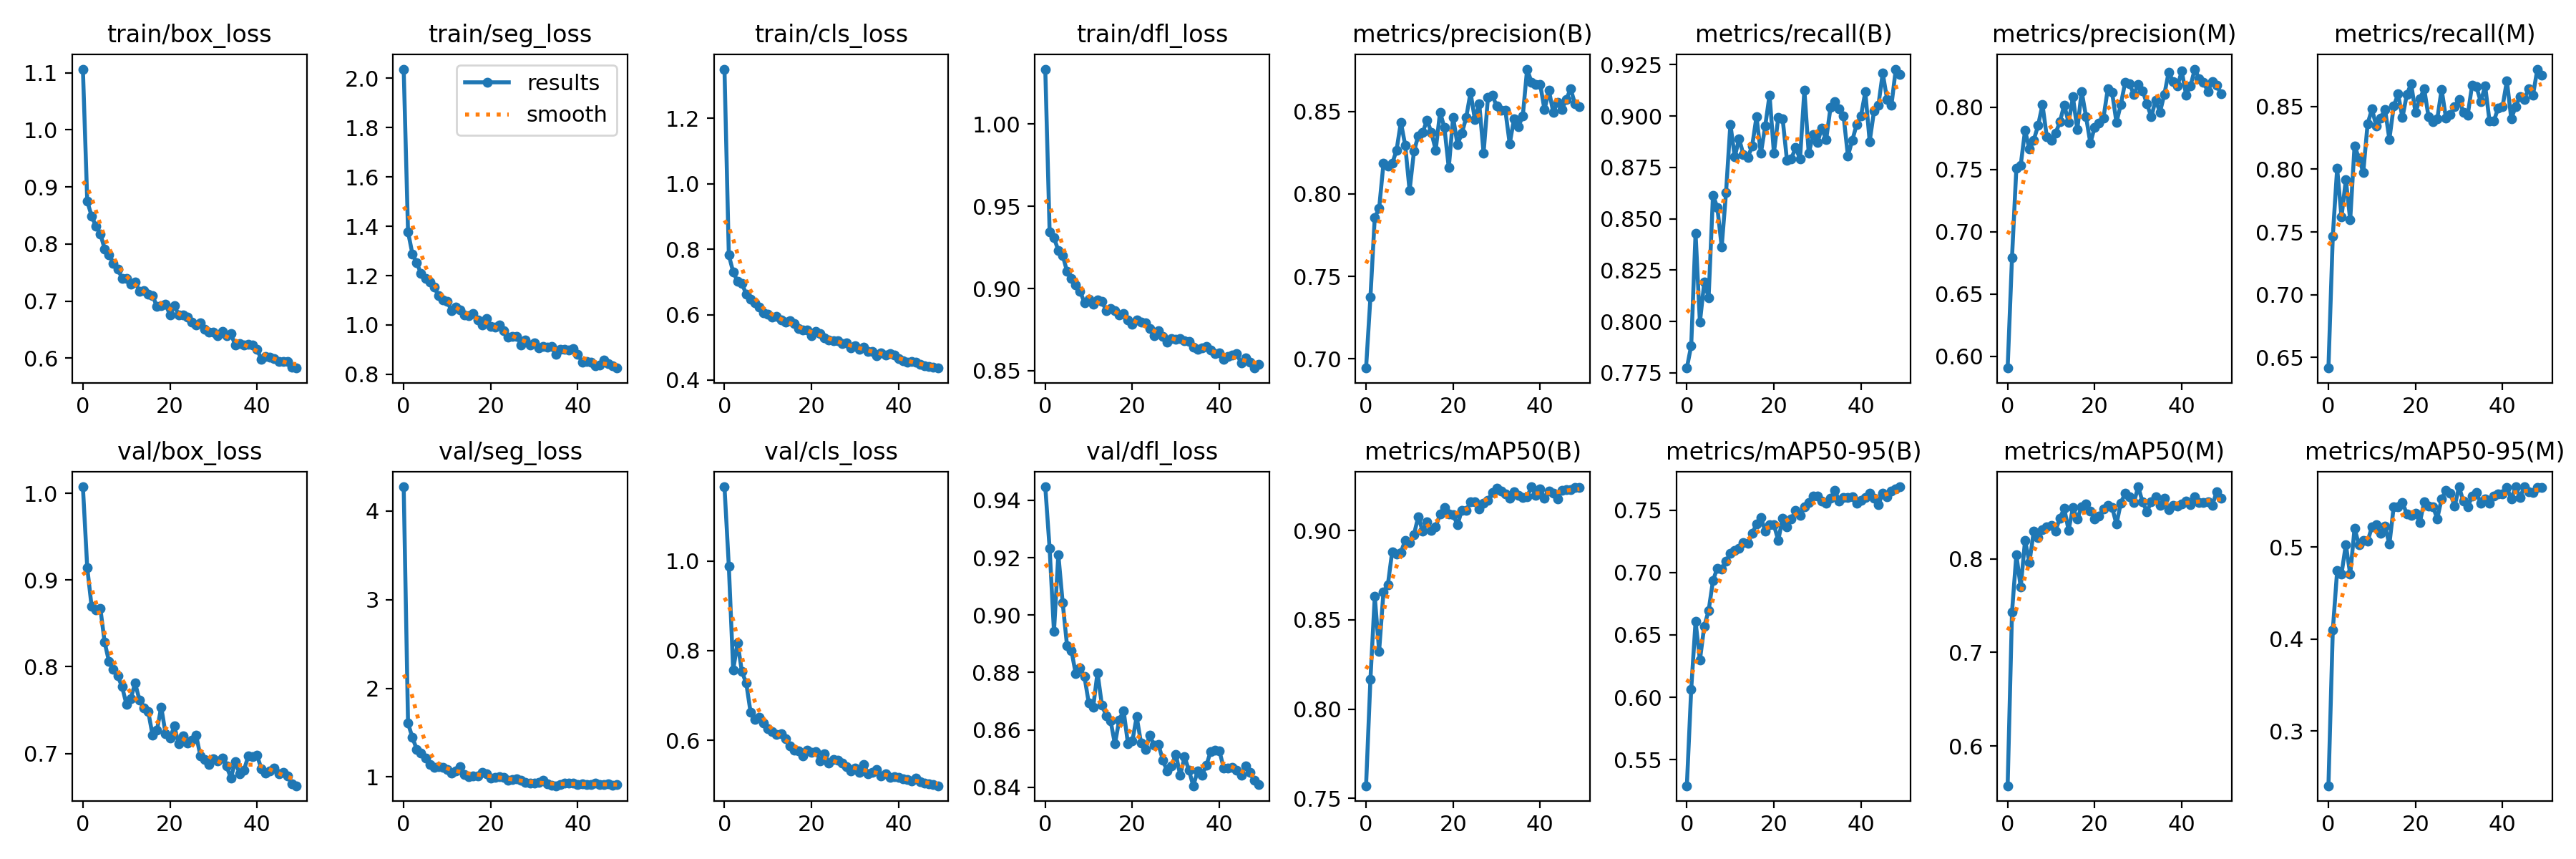

In [8]:
# Displaying model evaluation results
Image(filename='runs/segment/train/results.png', width=600)

In [9]:
# Testing
!yolo task=segment mode=val model=runs/segment/train/weights/best.pt data=test_data.yaml

Ultralytics YOLOv8.0.112 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780761 parameters, 0 gradients
val: Scanning /content/gdrive/My Drive/room_instance_segmentation/test/labels... 42 images, 0 backgrounds, 0 corrupt: 100% 42/42 [00:17<00:00,  2.33it/s]
val: New cache created: /content/gdrive/My Drive/room_instance_segmentation/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 3/3 [00:05<00:00,  1.80s/it]
                   all         42        975      0.848      0.926      0.902      0.758      0.807      0.875      0.847      0.543
                  DOOR         42        365      0.851      0.948      0.928      0.751      0.841      0.926      0.918      0.533
                  ROOM         42        210      0.903      0.971      0.961      0.927      0.909      0.976      0.962      0.849
                WINDOW 

In [10]:
# Inference
!yolo task=segment mode=predict model=runs/segment/train/weights/best.pt conf=0.25 source=test/images 

Ultralytics YOLOv8.0.112 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780761 parameters, 0 gradients

image 1/42 /content/gdrive/MyDrive/room_instance_segmentation/test/images/112344650_jpeg.rf.d71d63e3122950121e1b8fdcff5b1e3f.jpg: 640x640 14 DOORs, 7 ROOMs, 16 WINDOWs, 21.0ms
image 2/42 /content/gdrive/MyDrive/room_instance_segmentation/test/images/114435977_jpg.rf.9fa3aecc27a4dd9c9a336de59706a066.jpg: 640x640 10 DOORs, 5 ROOMs, 5 WINDOWs, 21.1ms
image 3/42 /content/gdrive/MyDrive/room_instance_segmentation/test/images/114507449_jpg.rf.1e63aa15691455d4856ad5617f36f321.jpg: 640x640 6 DOORs, 4 ROOMs, 5 WINDOWs, 21.0ms
image 4/42 /content/gdrive/MyDrive/room_instance_segmentation/test/images/114568850_jpg.rf.9e9253e11c31a7b345210a13b925f287.jpg: 640x640 12 DOORs, 6 ROOMs, 17 WINDOWs, 21.0ms
image 5/42 /content/gdrive/MyDrive/room_instance_segmentation/test/images/114660443_jpg.rf.5d515b314e1ef00fc5831f623cfe5d91.jpg: 640x640 11

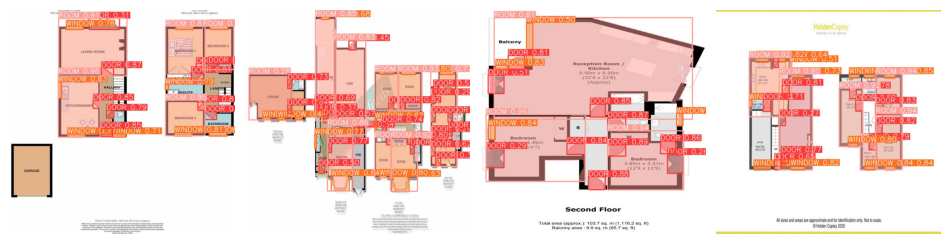

In [11]:
# Displaying the results of inference on the images

image_paths = glob.glob('runs/segment/predict/*.jpg')[10:14]
fig, axes = plt.subplots(1, 4, figsize=(12, 3))

for i, image_path in enumerate(image_paths):
    img = PIL.Image.open(image_path)
    axes[i].imshow(img)
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()